# ANALYSIS OF OIL & GAS EMISSIONS

## Introduction
The purpose of this analysis is to understand and visualize the emissions data from oil and gas activities for various countries over the years. The goal is to identify trends, outliers, and the overall impact of these emissions on the environment

#### Project Statement: Analysis and Tracking of Oil Gas Emissions for Environmental Impact Assessment


###### Objective:
To develop a comprehensive data analysis framework for tracking and evaluating emissions rk for tracking and evaluating emissions from oil and gas operations. This framework will help identify emission trends, potential sources of high emissions, and opportunities for emission reduction, thereby supporting environmental sustainability and regulatory compliance.


###### Impact:
This project aims to provide valuable insights into the emission patterns of oil and gas operations, enabling stakeholders to make informed decisions for reducing environmental impact. The outcomes will support regulatory compliance, improve operational efficiency, and contribute to global sustainability efforts.

## Data OverView
Country/ISO 3166-1 alpha-3/Year/Total/Coal/Oil/Gas/Cement/Flaring/Other/Per Capita

## Data Preprocessing
Data preprocessing steps include handling missing values, filtering data, and grouping by countries and years to calculate the total emissions.

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as po
import plotly.graph_objs as pg

In [3]:
# read full view dataset
#pd.set_option("display.max_rows",63110)

#changing decimal points to 2)
pd.options.display.float_format= "{:.2f}".format

In [4]:
# import and read files

df1 = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Data Analyst\Oil & Gas Emission Tracking\GCB2022v27_MtCO2_flat.csv")
df1

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.74,14506.97,12242.63,7144.93,1507.92,391.99,302.29,4.75
63100,Global,WLD,2018,36826.51,14746.83,12266.02,7529.85,1569.22,412.12,302.48,4.79
63101,Global,WLD,2019,37082.56,14725.98,12345.65,7647.53,1617.51,439.25,306.64,4.78
63102,Global,WLD,2020,35264.09,14174.56,11191.81,7556.29,1637.54,407.58,296.30,4.50


In [5]:
df2 = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Data Analyst\Oil & Gas Emission Tracking\GCB2022v27_percapita_flat.csv")
df2

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,4.75,1.91,1.61,0.94,0.20,0.05,0.04
63100,Global,WLD,2018,4.79,1.92,1.60,0.98,0.20,0.05,0.04
63101,Global,WLD,2019,4.78,1.90,1.59,0.98,0.21,0.06,0.04
63102,Global,WLD,2020,4.50,1.81,1.43,0.96,0.21,0.05,0.04


In [6]:
df3 = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Data Analyst\Oil & Gas Emission Tracking\GCB2022v27_sources_flat.csv")
df3

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
1,Afghanistan,AFG,1751,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
2,Afghanistan,AFG,1752,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
3,Afghanistan,AFG,1753,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
4,Afghanistan,AFG,1754,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63100,Global,WLD,2018,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63101,Global,WLD,2019,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63102,Global,WLD,2020,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."


In [27]:
df1.shape

(63104, 11)

In [7]:
df1.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [8]:
df1.tail()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63099,Global,WLD,2017,36096.74,14506.97,12242.63,7144.93,1507.92,391.99,302.29,4.75
63100,Global,WLD,2018,36826.51,14746.83,12266.02,7529.85,1569.22,412.12,302.48,4.79
63101,Global,WLD,2019,37082.56,14725.98,12345.65,7647.53,1617.51,439.25,306.64,4.78
63102,Global,WLD,2020,35264.09,14174.56,11191.81,7556.29,1637.54,407.58,296.30,4.50
63103,Global,WLD,2021,37123.85,14979.60,11837.16,7921.83,1672.59,416.53,296.15,4.69


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [12]:
df1.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.00,62904.00,21744.00,21717.00,21618.00,20814.00,21550.00,1620.00,18974.00
mean,1885.50,55.22,73.97,55.76,23.50,4.33,1.71,10.95,4.41
std,78.52,824.85,598.99,519.03,247.67,50.31,16.73,39.03,17.43
min,1750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1817.75,0.00,0.00,0.09,0.00,0.00,0.00,0.52,0.20
50%,1885.50,0.00,0.27,1.04,0.00,0.02,0.00,1.26,1.30
75%,1953.25,0.55,6.74,8.34,0.58,0.57,0.00,4.39,5.08
max,2021.00,37123.85,15051.51,12345.65,7921.83,1672.59,439.25,306.64,834.19


In [19]:
# chekcing for null values 
df1.isna().sum().sort_values()

Country                   0
Year                      0
Total                   200
ISO 3166-1 alpha-3     1632
Coal                  41360
Oil                   41387
Gas                   41486
Flaring               41554
Cement                42290
Per Capita            44130
Other                 61484
dtype: int64

In [20]:
df1.shape

(63104, 11)

##### Checking for other datasets

In [22]:
df2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df2.tail()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
63099,Global,WLD,2017,4.75,1.91,1.61,0.94,0.20,0.05,0.04
63100,Global,WLD,2018,4.79,1.92,1.60,0.98,0.20,0.05,0.04
63101,Global,WLD,2019,4.78,1.90,1.59,0.98,0.21,0.06,0.04
63102,Global,WLD,2020,4.50,1.81,1.43,0.96,0.21,0.05,0.04
63103,Global,WLD,2021,4.69,1.89,1.50,1.00,0.21,0.05,0.04


In [25]:
df2.shape #df2 dont have the per-capita columns

(63104, 10)

In [30]:
df3.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
1,Afghanistan,AFG,1751,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
2,Afghanistan,AFG,1752,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
3,Afghanistan,AFG,1753,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]
4,Afghanistan,AFG,1754,[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE],[NONE]


In [31]:
df3.tail()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63099,Global,WLD,2017,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63100,Global,WLD,2018,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63101,Global,WLD,2019,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63102,Global,WLD,2020,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."
63103,Global,WLD,2021,"CDIAC 2022, BP, and Sum of countries",CDIAC 2022 and BP,CDIAC 2022 and BP,CDIAC 2022 and BP,Andrew cement,CDIAC 2022 and GCP,[NONE],"CDIAC 2022, BP, Sum of countries, and UN popul..."


In [28]:
df3.shape

(63104, 11)

#### Start the Data Inspection 

In [32]:
# making copy of the datasets as per names
co2 = df1.copy()
per_capita = df2.copy()
sources = df3.copy()

In [34]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [37]:
co2.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.00,62904.00,21744.00,21717.00,21618.00,20814.00,21550.00,1620.00,18974.00
mean,1885.50,55.22,73.97,55.76,23.50,4.33,1.71,10.95,4.41
std,78.52,824.85,598.99,519.03,247.67,50.31,16.73,39.03,17.43
min,1750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1817.75,0.00,0.00,0.09,0.00,0.00,0.00,0.52,0.20
50%,1885.50,0.00,0.27,1.04,0.00,0.02,0.00,1.26,1.30
75%,1953.25,0.55,6.74,8.34,0.58,0.57,0.00,4.39,5.08
max,2021.00,37123.85,15051.51,12345.65,7921.83,1672.59,439.25,306.64,834.19


In [35]:
per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               18972 non-null  float64
 4   Coal                17138 non-null  float64
 5   Oil                 17039 non-null  float64
 6   Gas                 17012 non-null  float64
 7   Cement              15448 non-null  float64
 8   Flaring             16944 non-null  float64
 9   Other               1620 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ MB


In [38]:
per_capita.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
count,63104.00,18972.00,17138.00,17039.00,17012.00,15448.00,16944.00,1620.00
mean,1885.50,4.41,1.12,2.81,0.67,0.08,0.22,0.09
std,78.52,17.43,2.44,17.58,2.68,0.14,2.76,0.06
min,1750.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1817.75,0.19,0.00,0.13,0.00,0.00,0.00,0.04
50%,1885.50,1.29,0.04,0.76,0.00,0.03,0.00,0.07
75%,1953.25,5.08,1.10,2.65,0.18,0.12,0.00,0.12
max,2021.00,834.19,34.23,834.19,53.31,2.57,113.26,0.35


In [36]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             63104 non-null  object
 1   ISO 3166-1 alpha-3  61472 non-null  object
 2   Year                63104 non-null  int64 
 3   Total               63104 non-null  object
 4   Coal                63104 non-null  object
 5   Oil                 63104 non-null  object
 6   Gas                 63104 non-null  object
 7   Cement              63104 non-null  object
 8   Flaring             63104 non-null  object
 9   Other               63104 non-null  object
 10  Per Capita          63104 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.3+ MB


In [39]:
sources.describe()

,Year
count,63104.00
mean,1885.50
std,78.52
min,1750.00
25%,1817.75
50%,1885.50
75%,1953.25
max,2021.00


In [44]:
# Replacing null values with the '0' 
# Considering past years dont have much technology that can emit co2 gases --> safe to say as zero instead of using 'Mean' values
co2 = df1.fillna(0)
co2

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,AFG,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,AFG,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,AFG,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.74,14506.97,12242.63,7144.93,1507.92,391.99,302.29,4.75
63100,Global,WLD,2018,36826.51,14746.83,12266.02,7529.85,1569.22,412.12,302.48,4.79
63101,Global,WLD,2019,37082.56,14725.98,12345.65,7647.53,1617.51,439.25,306.64,4.78
63102,Global,WLD,2020,35264.09,14174.56,11191.81,7556.29,1637.54,407.58,296.30,4.50


In [54]:
# counting the total countries in the datasets

co2["Country"].nunique()

232

In [57]:
#Each countries represent 272 times because of the data is taken form each countries starting from 272 years ago. Total countires involved is 232 countries
co2["Country"].value_counts()

Country
Afghanistan    272
Peru           272
Niger          272
Nigeria        272
Niue           272
              ... 
Greenland      272
Grenada        272
Guadeloupe     272
Guatemala      272
Global         272
Name: count, Length: 232, dtype: int64

In [60]:
# checking on the years validation of 272 years
co2["Year"].unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [64]:
# checking on the validation of 232 countris involved

co2["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [68]:
# exclude the 'Global' rows
co2 = co2[co2["Country"] != "Global"]
co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62832 entries, 0 to 62831
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             62832 non-null  object 
 1   ISO 3166-1 alpha-3  62832 non-null  object 
 2   Year                62832 non-null  int64  
 3   Total               62832 non-null  float64
 4   Coal                62832 non-null  float64
 5   Oil                 62832 non-null  float64
 6   Gas                 62832 non-null  float64
 7   Cement              62832 non-null  float64
 8   Flaring             62832 non-null  float64
 9   Other               62832 non-null  float64
 10  Per Capita          62832 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.8+ MB


In [72]:
# Creating a sub datasets
df = co2[["Country","Year","Total"]]
df.head()

,Country,Year,Total
0,Afghanistan,1750,0.00
1,Afghanistan,1751,0.00
2,Afghanistan,1752,0.00
3,Afghanistan,1753,0.00
4,Afghanistan,1754,0.00


In [84]:
# getting the Top 10 highest emission total of countries
final1 = df.groupby(["Country"])["Total"].sum().sort_values(ascending=False)[:10].reset_index()
final1

,Country,Total
0,USA,421906.86
1,China,249352.82
2,Russia,117547.63
3,Germany,93290.50
4,United Kingdom,78508.72
5,Japan,66711.08
6,India,57105.39
7,International Transport,43062.67
8,France,39105.76
9,Canada,34115.40


###### Can be concluded that USA has the highest co2 emissions past 272 years above China and Russia respectively at the second an third position

In [86]:
final1["Country"].unique()

array(['USA', 'China', 'Russia', 'Germany', 'United Kingdom', 'Japan',
       'India', 'International Transport', 'France', 'Canada'],
      dtype=object)

#### Data Inspection Summary
1. Only the Country and Year columns do not have null values.
2. The dataset 'df1' shape comprises of 63,104 rows and 11 columns
3. The number if countries invloved in 'df1' dataset is 232 countries and the data taken for 272 years staring form 1750-2021.
4. The Top 10 highest co2 emission countries are: 'USA', 'China', 'Russia', 'Germany', 'United Kingdom', 'Japan',
       'India', 'International Transport', 'France', 'Canada'

## Exploratory Data Analysis (EDA)

### 4.1 Emissions Over the Years
Visualizations were created to show the total emissions over the years for the top 10 countries with the highest emissions. This helps in understanding the trend of emissions over time.

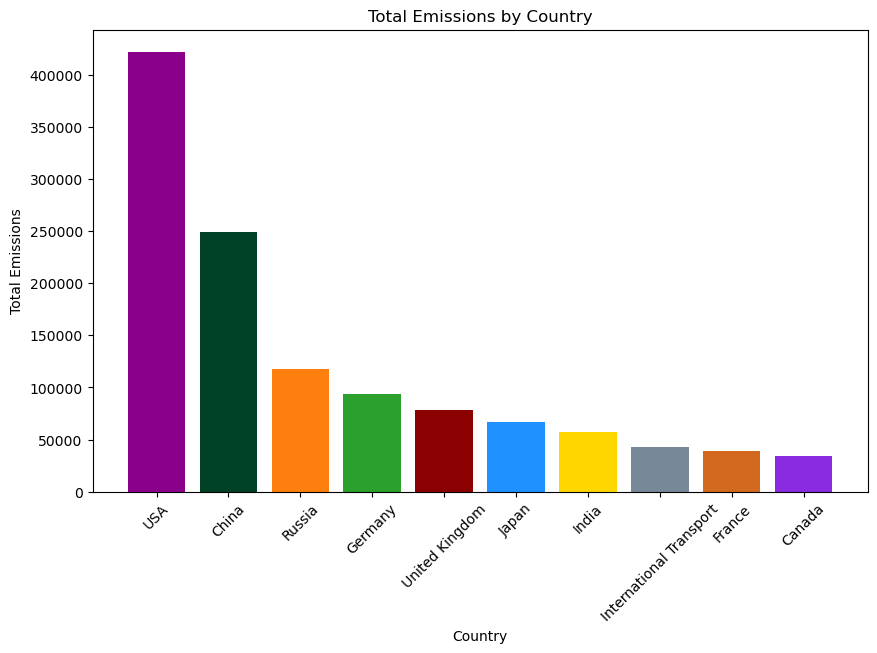

In [102]:
# EDA on the top 10 countries subset only
plt.figure(figsize = (10,6))
colors = ["#8B008B", "#004225", "#ff7f0e", "#2ca02c", "#8B0000", "#1E90FF", "#FFD700", "#778899", "#D2691E", "#8A2BE2"]
plt.bar(final1["Country"], final1["Total"],color = colors)
plt.xlabel("Country")
plt.ylabel("Total Emissions")
plt.title("Total Emissions by Country")
plt.xticks(rotation=45)
plt.show()


In [108]:
# Emissions in Malaysia
My = df.query('Country == "Malaysia"')
My

,Country,Year,Total
33728,Malaysia,1750,0.00
33729,Malaysia,1751,0.00
33730,Malaysia,1752,0.00
33731,Malaysia,1753,0.00
33732,Malaysia,1754,0.00
...,...,...,...
33995,Malaysia,2017,248.20
33996,Malaysia,2018,267.09
33997,Malaysia,2019,269.16
33998,Malaysia,2020,259.48


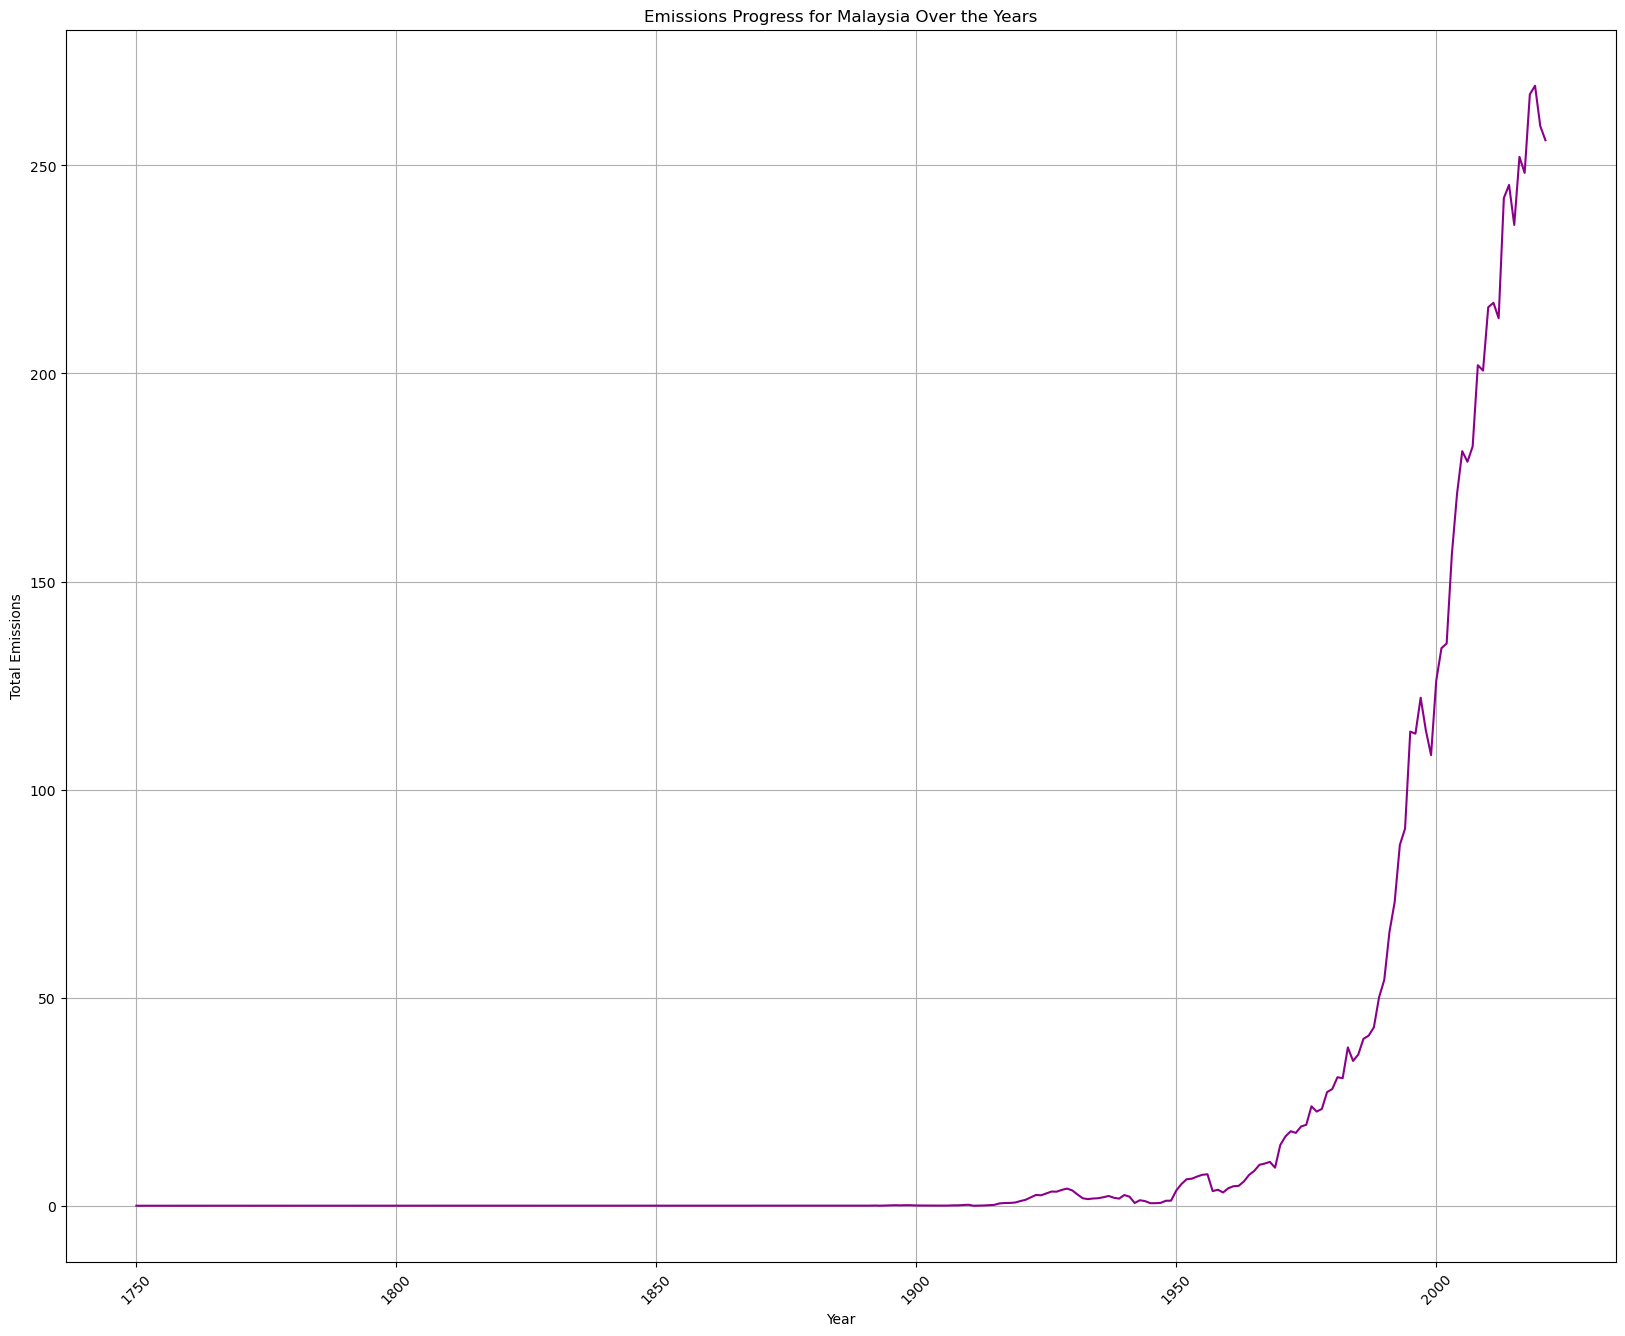

In [128]:
# plot graph representation of Emission in Malaysia sicne 1750 t0 2021

plt.figure(figsize=(20, 16))
plt.plot(My["Year"], My["Total"], linestyle="-", color="#8B008B")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.title("Emissions Progress for Malaysia Over the Years")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Emission Progression Plot For Sample Countries

##### USA

In [120]:
usa = co2[["Country","Year","Total"]]
usa = usa.query('Country == "USA"')
usa

,Country,Year,Total
59840,USA,1750,0.00
59841,USA,1751,0.00
59842,USA,1752,0.00
59843,USA,1753,0.00
59844,USA,1754,0.00
...,...,...,...
60107,USA,2017,5210.96
60108,USA,2018,5376.66
60109,USA,2019,5259.14
60110,USA,2020,4715.69


In [121]:
usa.tail()

,Country,Year,Total
60107,USA,2017,5210.96
60108,USA,2018,5376.66
60109,USA,2019,5259.14
60110,USA,2020,4715.69
60111,USA,2021,5007.34


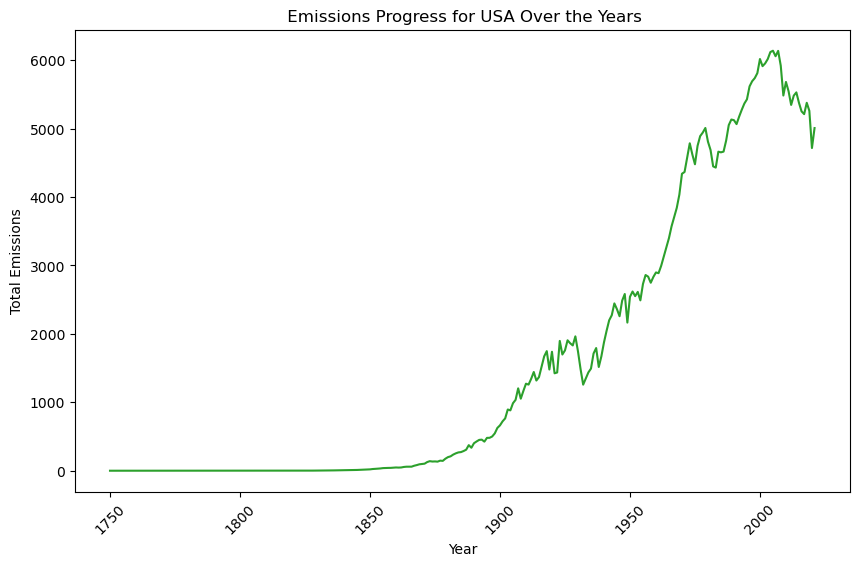

In [127]:
# Line Plot for usa

plt.figure(figsize = (10,6))
plt.plot(usa["Year"], usa["Total"], linestyle = "-", color = "#2ca02c")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.title(" Emissions Progress for USA Over the Years")
plt.xticks(rotation=45)
plt.show()

##### CHINA

In [129]:
china = co2[["Country","Year","Total"]]
china = china.query('Country == "China"')
china

,Country,Year,Total
10608,China,1750,0.00
10609,China,1751,0.00
10610,China,1752,0.00
10611,China,1753,0.00
10612,China,1754,0.00
...,...,...,...
10875,China,2017,10011.11
10876,China,2018,10353.88
10877,China,2019,10741.00
10878,China,2020,10956.21


In [130]:
china.head()


,Country,Year,Total
10608,China,1750,0.00
10609,China,1751,0.00
10610,China,1752,0.00
10611,China,1753,0.00
10612,China,1754,0.00


In [131]:
china.tail()

,Country,Year,Total
10875,China,2017,10011.11
10876,China,2018,10353.88
10877,China,2019,10741.00
10878,China,2020,10956.21
10879,China,2021,11472.37


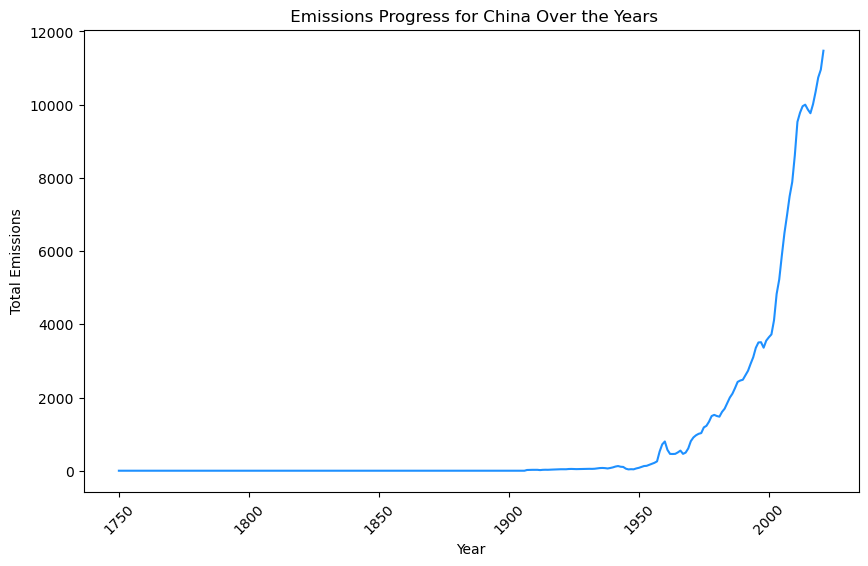

In [133]:
# Line Plot for China

plt.figure(figsize = (10,6))
plt.plot(china["Year"], china["Total"], linestyle = "-", color = "#1E90FF")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.title(" Emissions Progress for China Over the Years")
plt.xticks(rotation=45)
plt.show()

In [137]:
# Doing comparison of the emission progress for the top 10 highest countries
# creating subset for the top 10 highest emission county without grouping them
sum_by_country = co2.groupby("Country").sum()
sum_by_country

,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,,
Afghanistan,AFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGAFGA...,512856,217.99,57.68,131.58,20.27,2.52,5.96,0.00,10.91
Albania,ALBALBALBALBALBALBALBALBALBALBALBALBALBALBALBA...,512856,293.84,66.78,185.84,16.71,24.38,0.14,0.00,103.49
Algeria,DZADZADZADZADZADZADZADZADZADZADZADZADZADZADZAD...,512856,4862.57,117.54,1653.70,2154.35,243.22,693.76,0.00,170.06
Andorra,ANDANDANDANDANDANDANDANDANDANDANDANDANDANDANDA...,512856,15.48,0.00,15.48,0.00,0.00,0.00,0.00,222.47
Angola,AGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOAGOA...,512856,657.12,1.60,346.83,46.11,26.09,236.49,0.00,39.18
...,...,...,...,...,...,...,...,...,...,...
Viet Nam,VNMVNMVNMVNMVNMVNMVNMVNMVNMVNMVNMVNMVNMVNMVNMV...,512856,4623.87,2266.98,1408.50,310.35,620.71,17.33,0.00,56.59
Wallis and Futuna Islands,WLFWLFWLFWLFWLFWLFWLFWLFWLFWLFWLFWLFWLFWLFWLFW...,512856,0.77,0.00,0.77,0.00,0.00,0.00,0.00,57.82
Yemen,YEMYEMYEMYEMYEMYEMYEMYEMYEMYEMYEMYEMYEMYEMYEMY...,512856,651.60,4.98,595.08,13.64,23.04,14.86,0.00,42.65


In [144]:
top_10 = sum_by_country.sort_values(by="Total", ascending=False)[:10]
top_10

,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,,
USA,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,512856,421906.86,175444.99,161275.03,78542.54,2795.83,2421.25,1427.21,2252.10
China,CHNCHNCHNCHNCHNCHNCHNCHNCHNCHNCHNCHNCHNCHNCHNC...,512856,249352.82,187073.41,34491.54,7162.01,15657.81,68.49,4899.55,202.36
Russia,RUSRUSRUSRUSRUSRUSRUSRUSRUSRUSRUSRUSRUSRUSRUSR...,512856,117547.63,45571.47,33219.82,35054.21,1659.17,1486.45,556.50,803.01
Germany,DEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUD...,512856,93290.50,64665.84,19852.71,7177.26,1206.61,93.57,294.51,1311.38
United Kingdom,GBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRG...,512856,78508.72,56850.60,13545.63,7183.23,523.55,290.45,115.26,1645.53
Japan,JPNJPNJPNJPNJPNJPNJPNJPNJPNJPNJPNJPNJPNJPNJPNJ...,512856,66711.08,24175.93,33153.13,7061.83,2005.37,15.54,299.29,586.28
India,INDINDINDINDINDINDINDINDINDINDINDINDINDINDINDI...,512856,57105.39,37018.08,14798.26,2482.90,2624.33,181.82,0.00,58.11
International Transport,XITXITXITXITXITXITXITXITXITXITXITXITXITXITXITX...,512856,43062.67,0.00,43062.67,0.00,0.00,0.00,0.00,0.00
France,FRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAF...,512856,39105.76,19078.95,15350.88,3663.17,699.43,171.55,141.78,796.10


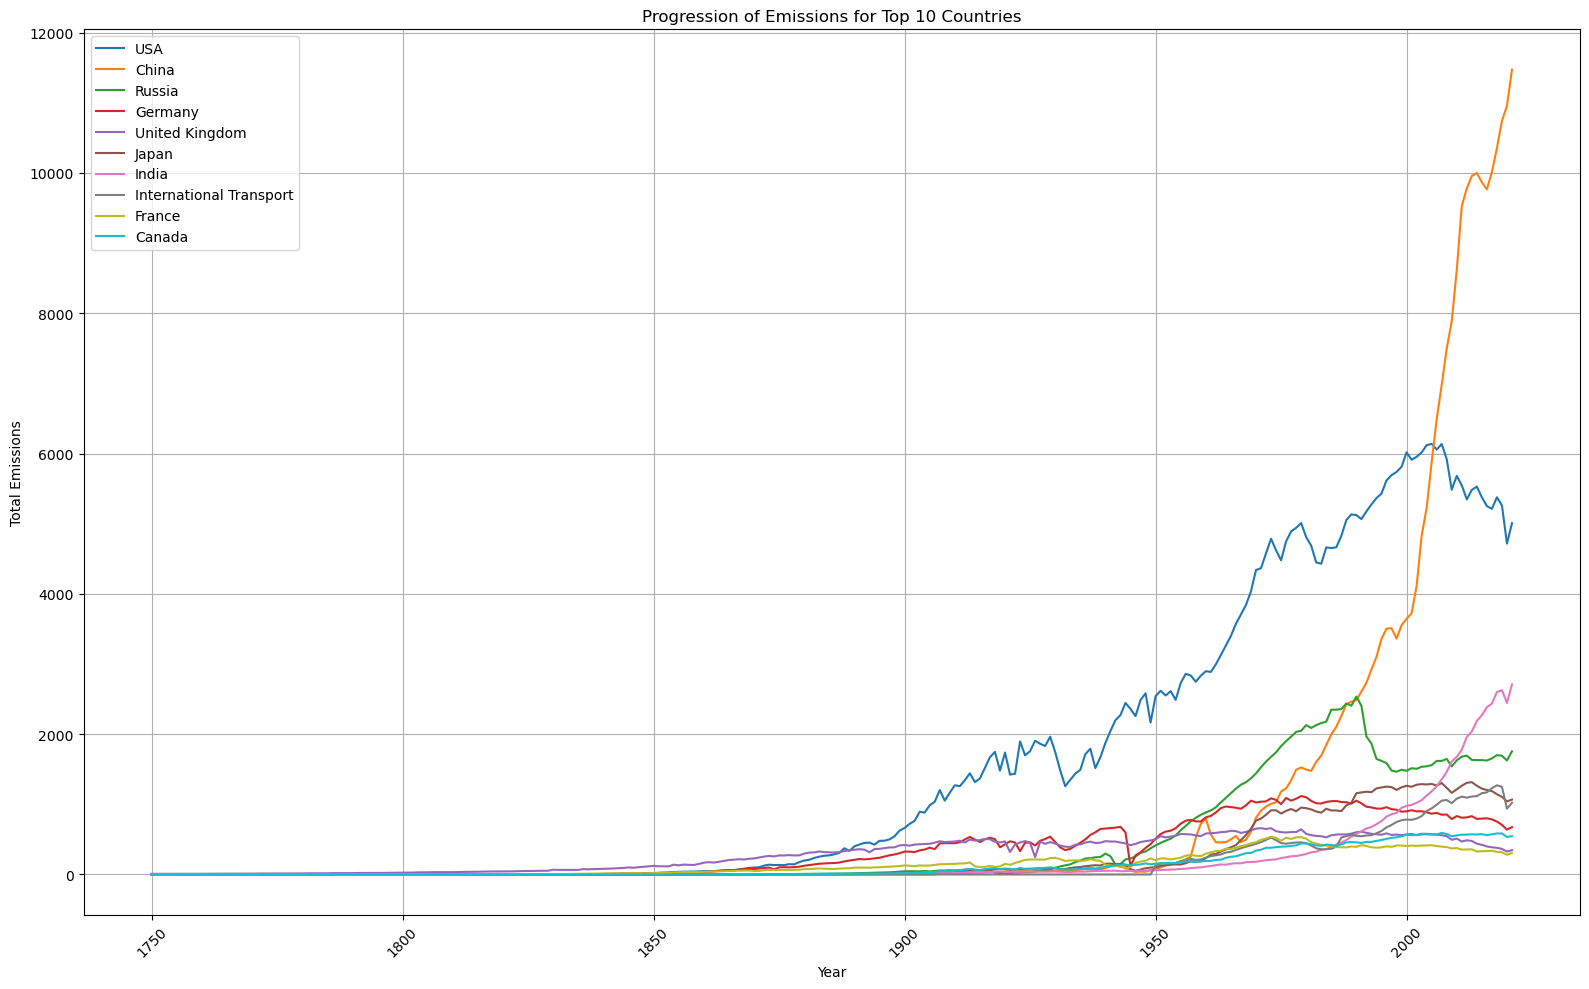

In [145]:
#Plotting each countries emission over the years
plt.figure(figsize=(16,10))
colors = plt.cm.tab10.colors

for i, country in enumerate(top_10.index):
    country_emm = co2[co2["Country"] == country]
    plt.plot(country_emm['Year'], country_emm['Total'], linestyle='-', label=country, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Progression of Emissions for Top 10 Countries')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.2 Emissions by Source
The dataset was analyzed to break down emissions by different sources such as coal, oil, gas, cement, flaring, and others.

#### Emission from Oil

In [146]:
co2

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,AFG,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,AFG,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,AFG,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,1230.51,0.00,1230.51,0.00,0.00,0.00,0.00,0.00
62828,International Transport,XIT,2018,1270.69,0.00,1270.69,0.00,0.00,0.00,0.00,0.00
62829,International Transport,XIT,2019,1249.56,0.00,1249.56,0.00,0.00,0.00,0.00,0.00
62830,International Transport,XIT,2020,938.51,0.00,938.51,0.00,0.00,0.00,0.00,0.00


In [160]:
# creating subest for oil data
oil = co2.groupby(["Country","Year"])["Oil"].sum().reset_index()
oil

,Country,Year,Oil
0,Afghanistan,1750,0.00
1,Afghanistan,1751,0.00
2,Afghanistan,1752,0.00
3,Afghanistan,1753,0.00
4,Afghanistan,1754,0.00
...,...,...,...
62827,Zimbabwe,2017,3.23
62828,Zimbabwe,2018,4.06
62829,Zimbabwe,2019,3.66
62830,Zimbabwe,2020,3.32


In [163]:
top_10_oil = oil.groupby(["Country"])["Oil"].sum().nlargest(10).index
top_10_oil

Index(['USA', 'International Transport', 'China', 'Russia', 'Japan', 'Germany',
       'France', 'Canada', 'India', 'Italy'],
      dtype='object', name='Country')

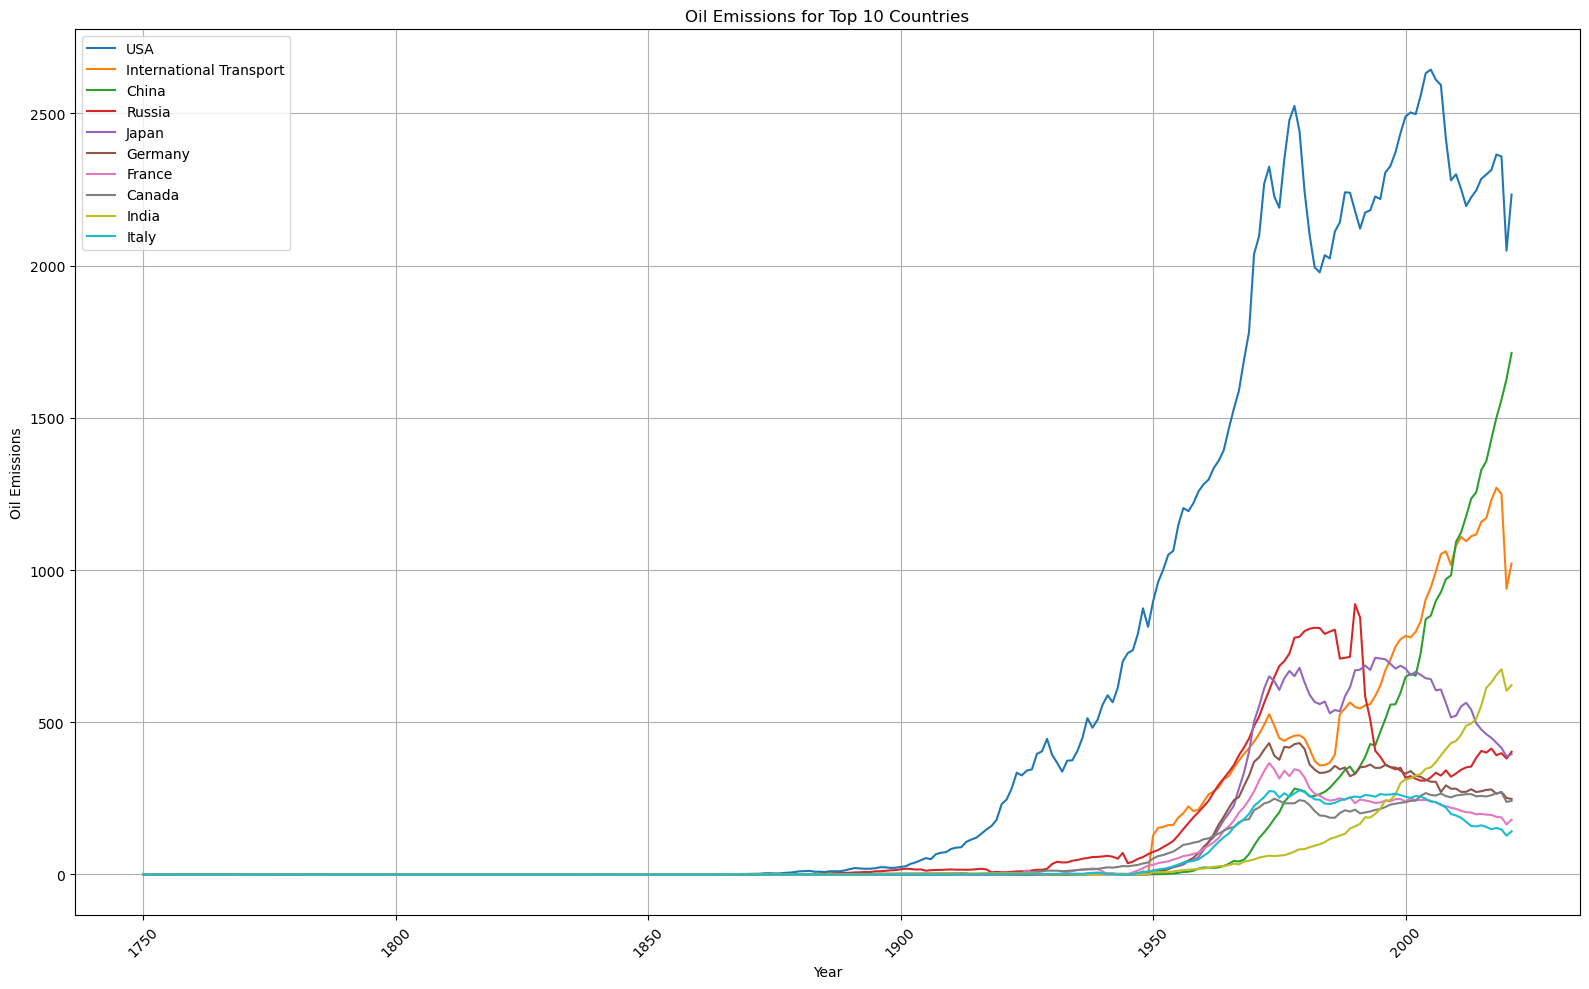

In [168]:
# plotting the graph
plt.figure(figsize=(16,10))

for country in top_10_oil:
    country_oil = oil[oil["Country"] == country]
    plt.plot(country_oil['Year'], country_oil['Oil'], linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Oil Emissions')
plt.title('Oil Emissions for Top 10 Countries')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

#### Emissions From Gas

In [169]:
gas = co2.groupby(["Country","Year"])["Gas"].sum().reset_index()
gas

,Country,Year,Gas
0,Afghanistan,1750,0.00
1,Afghanistan,1751,0.00
2,Afghanistan,1752,0.00
3,Afghanistan,1753,0.00
4,Afghanistan,1754,0.00
...,...,...,...
62827,Zimbabwe,2017,0.00
62828,Zimbabwe,2018,0.00
62829,Zimbabwe,2019,0.00
62830,Zimbabwe,2020,0.00


In [182]:
top_10_gas = gas.groupby(["Country"])["Gas"].sum().nlargest(10).index
top_10_gas

Index(['USA', 'Russia', 'Canada', 'Iran', 'United Kingdom', 'Germany', 'China',
       'Japan', 'Ukraine', 'Italy'],
      dtype='object', name='Country')

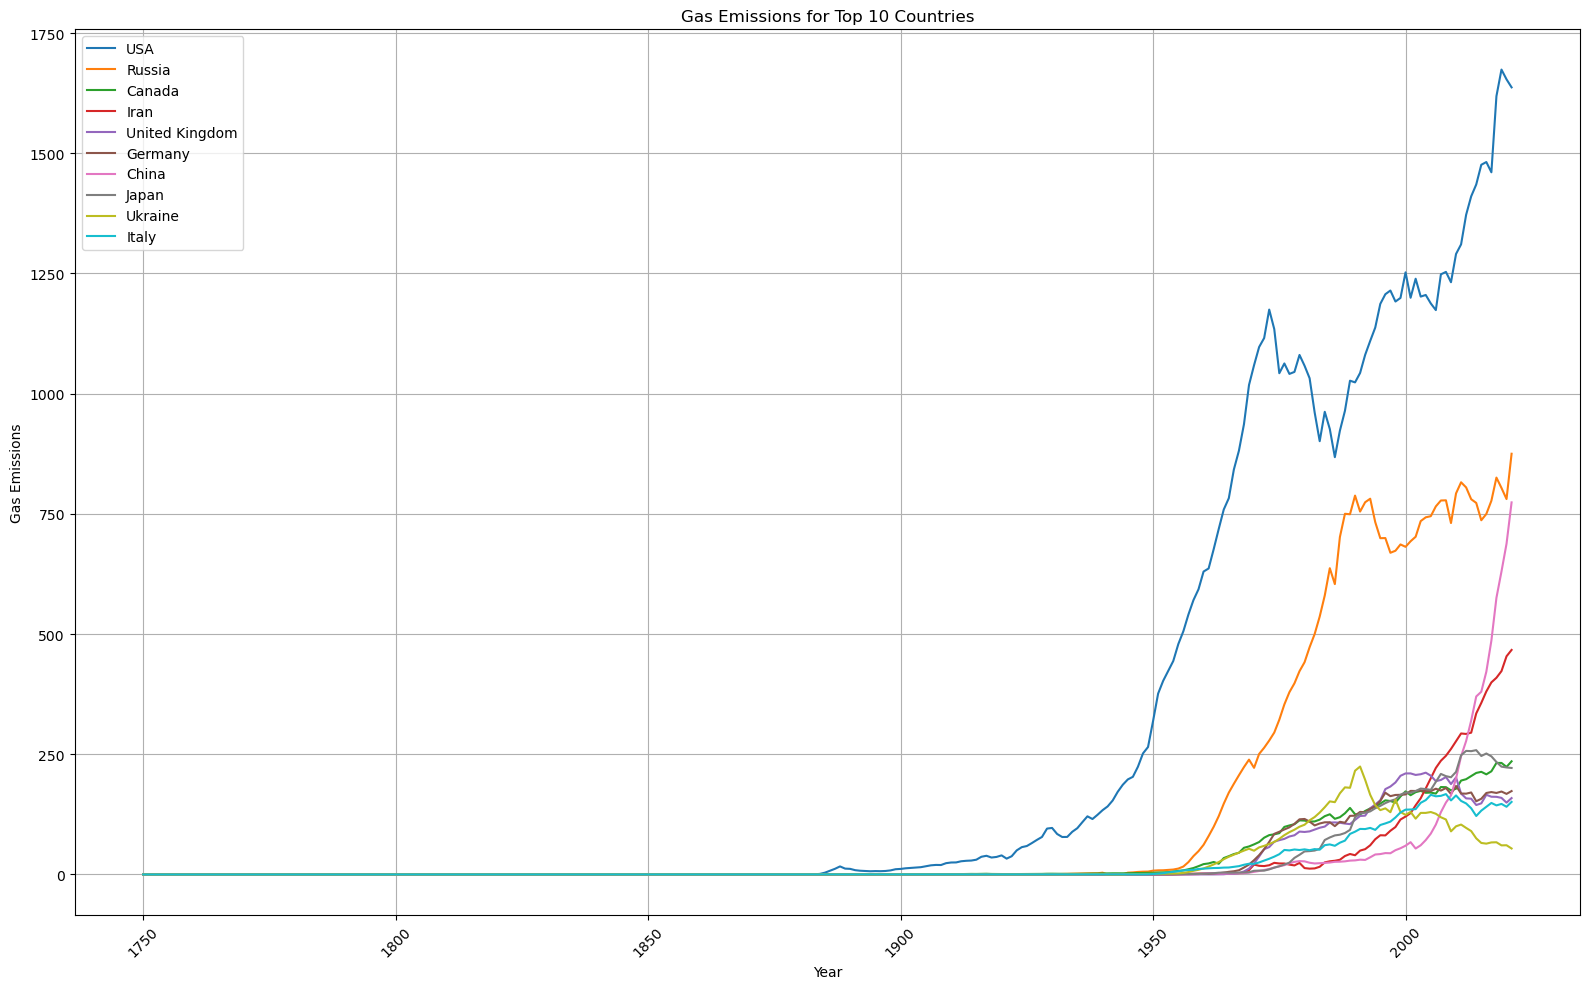

In [173]:
plt.figure(figsize=(16,10))

for country in top_10_gas:
    country_gas = gas[gas["Country"] == country]
    plt.plot(country_gas["Year"], country_gas["Gas"], linestyle="-", label=country)

plt.xlabel('Year')
plt.ylabel('Gas Emissions')
plt.title('Gas Emissions for Top 10 Countries')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

#### EDA Summary
1. The bar chart shows a visualization of the USA being the country with the highest emission rate throught the years.
2. The USA also lead in the sum amount of emission for Oil and Gas.
3. International Transport displays almost zero emission rate.
4. Malaysia compared toother 10 country elements has the least Oil emission plot.
5. China has the highest yearly total emissions from about the year 2000.

## 5. Predictive Modeling

In [175]:
#Importing imprtant libraries from scikit learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# To disable warning
import warnings
warnings.filterwarnings("ignore")

In [195]:
#Creating new subest for Machine Learning model based on top 10 oil emission country + malaysia
df_ml = co2[co2["Country"].isin(["USA", "China", "Russia", "Germany", "United Kingdom", "International Transport", "India", "France", "Malaysia"])]
df_ml

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10608,China,CHN,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10609,China,CHN,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10610,China,CHN,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10611,China,CHN,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10612,China,CHN,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,1230.51,0.00,1230.51,0.00,0.00,0.00,0.00,0.00
62828,International Transport,XIT,2018,1270.69,0.00,1270.69,0.00,0.00,0.00,0.00,0.00
62829,International Transport,XIT,2019,1249.56,0.00,1249.56,0.00,0.00,0.00,0.00,0.00
62830,International Transport,XIT,2020,938.51,0.00,938.51,0.00,0.00,0.00,0.00,0.00


In [198]:
df_ml["Per Capita"].nunique()

1221

In [199]:
df_ml.shape

(2448, 11)

In [203]:
# Selecting target
y = df_ml["Per Capita"]
y

10608   0.00
10609   0.00
10610   0.00
10611   0.00
10612   0.00
        ... 
62827   0.00
62828   0.00
62829   0.00
62830   0.00
62831   0.00
Name: Per Capita, Length: 2448, dtype: float64

In [204]:
# Choosing Training and testing dataset 
# dropping the string for the modelling
X = df_ml.drop(["Per Capita","ISO 3166-1 alpha-3","Country"], axis = 1)
X.head(10)

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
10608,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10609,1751,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10610,1752,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10611,1753,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10612,1754,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10613,1755,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10614,1756,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10615,1757,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10616,1758,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10617,1759,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Train_Test_Split

In [210]:
# splitting dataset into training and testing with split ration 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

#### Optimal Training and Testing Model Determination

##### 1. Linear Regression
A linear regression model was trained and tested on the dataset. The performance was evaluated using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).


In [211]:

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression RMSE:", lr_rmse)

Linear Regression MSE: 4.72165192640409
Linear Regression RMSE: 2.172936245361122


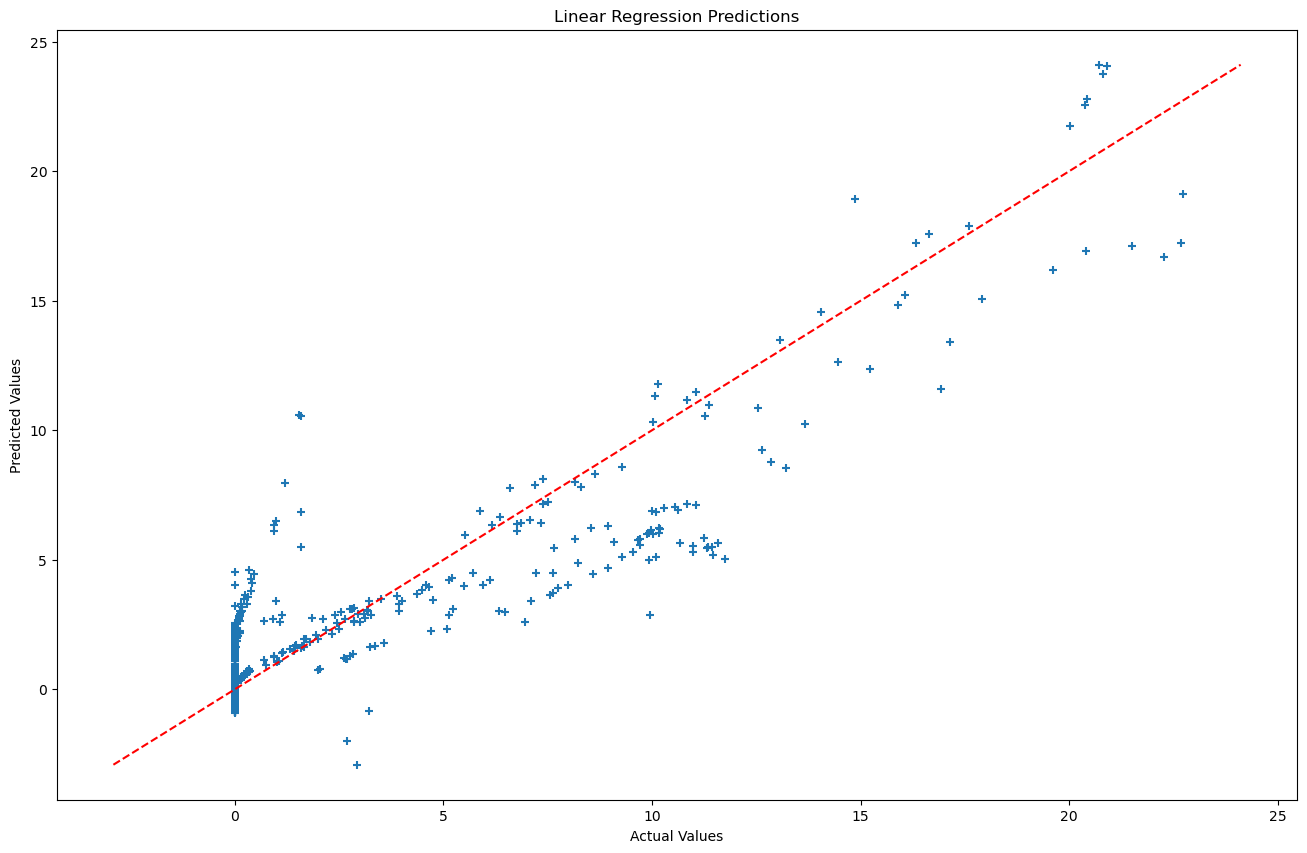

In [216]:
# Plotting graph comparison between predcted and the actual values

plt.figure(figsize = (16,10))
plt.scatter(y_test, lr_pred, marker = "+")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions")

# plotting straight prediction line
min_val = min(y_test.min(), lr_pred.min())
max_val = max(y_test.max(), lr_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.show()

##### 2.Polynomial Regression


In [222]:
# transform into polynomial 
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)


In [225]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_poly_train)
poly_reg_pred = poly_reg.predict(X_poly_test)
poly_reg_mse = mean_squared_error(y_poly_test, poly_reg_pred)
poly_reg_rmse = np.sqrt(poly_reg_mse)

print("Polynomial Regression MSE:", poly_reg_mse)
print("Polynomial Regression RMSE:", poly_reg_rmse)

Polynomial Regression MSE: 1.8347849536764107
Polynomial Regression RMSE: 1.3545423410423207


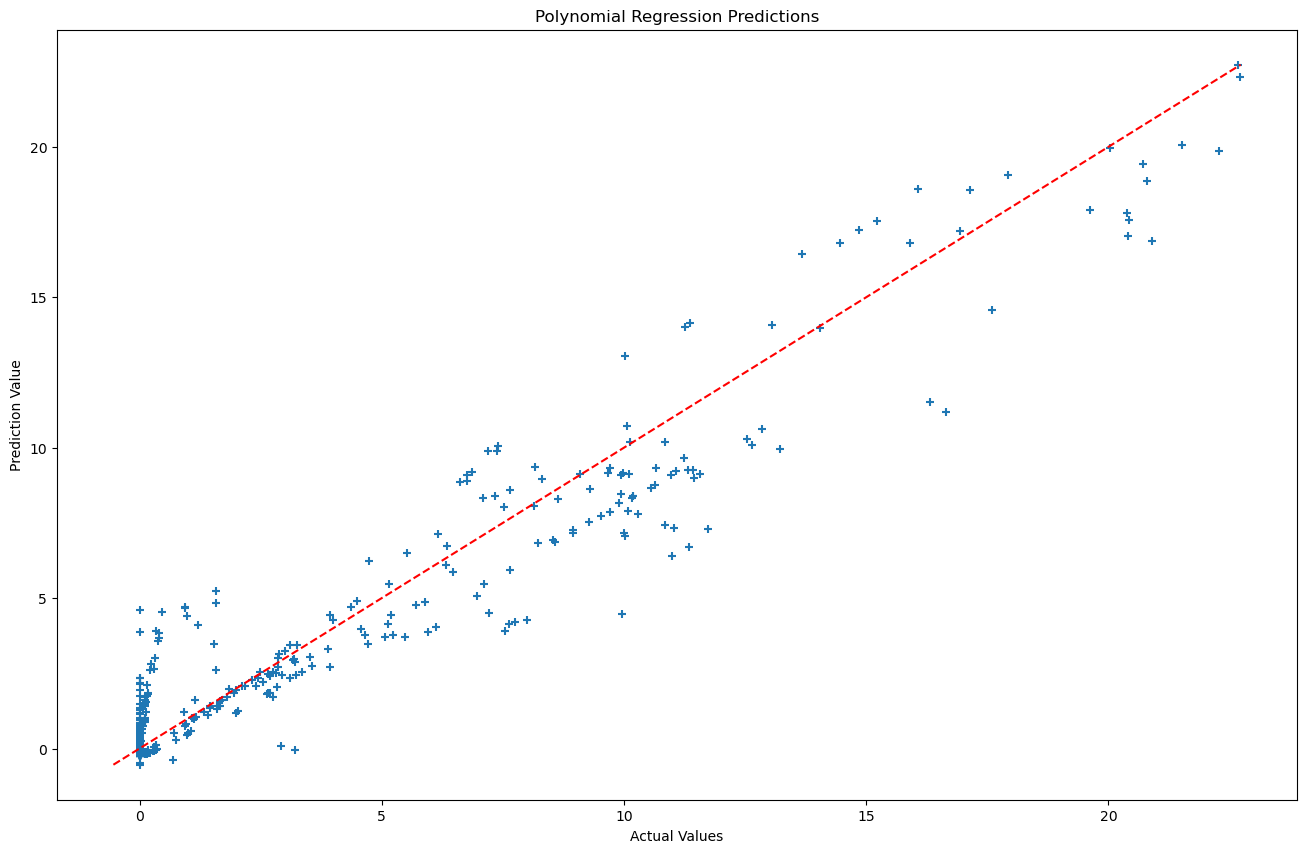

In [230]:
# ploting the graph

plt.figure(figsize= (16,10))
plt.scatter(y_poly_test, poly_reg_pred, marker="+")
plt.xlabel("Actual Values")
plt.ylabel("Prediction Value")
plt.title("Polynomial Regression Predictions")

# plotting straight prediction line
min_val = min(y_test.min(), poly_reg_pred.min())
max_val = max(y_test.max(), poly_reg_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.show()


##### 3. Decision Tree Regression
A decision tree regression model was also tested to compare performance with the linear regression model.


In [220]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
print("Decision Tree Regression MSE:", dt_mse)
print("Decision Tree Regression RMSE:", dt_rmse)

Decision Tree Regression MSE: 0.2887241472983816
Decision Tree Regression RMSE: 0.5373305754359988


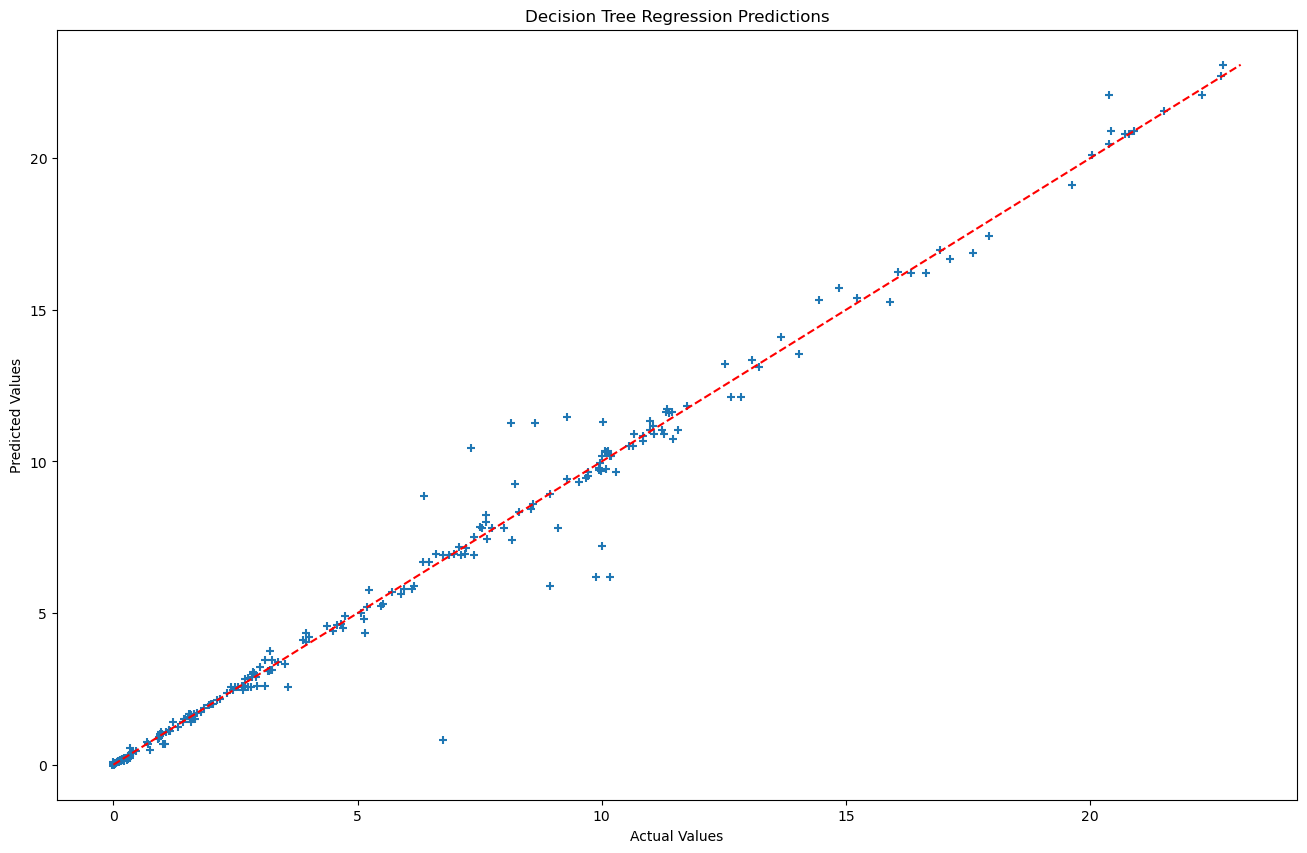

In [221]:
# Plotting graph comparison between predcted and the actual values
plt.figure(figsize = (16,10))
plt.scatter(y_test, dt_pred, marker = "+")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression Predictions")

# plotting straight prediction line
min_val = min(y_test.min(), dt_pred.min())
max_val = max(y_test.max(), dt_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.show()

## 6. Results and Discussion
The analysis identified key trends in emissions data, with some countries showing significant increases in emissions over time. The predictive models provide a quantitative measure of these trends.

### ML SUmmary

1. Reason of choosing regression model is because the target is a continous variable instead of binary.
2. The measure of identifying used were the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and a scatterplot for visualisation.
3. In this visualisation, we use a best-fit regression plot to determine the most preferred model.
4. The Decision Tree Regression model appears to be best, as the points are closely stacked, following a trend.
5. The reason for not using only the MSE to determine the best regression model, is because it can be negatively affected by outliers.
liers.tliers.

## 7. Conclusion
This analysis provides valuable insights into oil and gas emissions, highlighting significant trends and the effectiveness of different predictive models. The decision tree regression model was preferred due to its superior performance in capturing the complexities of the data.